In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
import cmcrameri.cm as cmc

sys.path.append('/home/iganesh/pvert')
from FresnelCoefficients import FresnelH, FresnelV

### <b> magellan brightness temperature values </b>
'COUNT': 8745798,

'CV': 0.0805134279966219,

'EMPTY': 0,

'FILLED': 8745798,

'FIRSTQUARTILE': 628.5603637695312,

'IQR': 26.87860107421875,

'MAJORITY': 635.9828491210938,

'MAX': 6214.51611328125,

'MEAN': 635.4576992234412,

'MEDIAN': 641.2651977539062,

'MIN': -760.8611450195312,

'MINORITY': -760.8611450195312,

'OUTPUT_HTML_FILE': 'C:/Users/iganesh/AppData/Local/Temp/processing_Ljfskn/2fd3540d3e244098bf22db1cd6f0d5a8/OUTPUT_HTML_FILE.html',

'RANGE': 6975.377258300781,

'STD_DEV': 51.16287771132554,

'SUM': 5557584674.952973,

'THIRDQUARTILE': 655.43896484375,

'UNIQUE': 1868823




### <b> magellan brightness temperature incidence angle values </b>
{'COUNT': 8745798,
'CV': 0.3048149529840064,
'EMPTY': 0,
'FILLED': 8745798,
'FIRSTQUARTILE': 24.770139694213867,
'IQR': 17.02301597595215,
'MAJORITY': 19.622961044311523,
'MAX': 66.10311889648438,
'MEAN': 31.499683166166445,
'MEDIAN': 27.318138122558594,
'MIN': 5.679745674133301,
'MINORITY': 5.679745674133301,
'OUTPUT_HTML_FILE': 'C:/Users/iganesh/AppData/Local/Temp/processing_Ljfskn/2acfc492fbcc4dad8c343e65a55229d0/OUTPUT_HTML_FILE.html',
'RANGE': 60.423373222351074,
'STD_DEV': 9.601574443306124,
'SUM': 275489866.03529215,
'THIRDQUARTILE': 41.793155670166016,
'UNIQUE': 4838540}

In [2]:
## considering a temperature of 1000 C at 2 m depth
m2 = 263.5
b2 = 473

## considering a temperature of 750 C at 2 m depth
m3 = 138.5
b3 = 473

## considering a temperature of 500 C at 2 m depth
m4 = 13.5
b4 = 473

## considering a temperature of 1250 C at 2 m depth
m1 = 388.5
b1 = 473

m = np.array([m1, m2, m3]) #, m4])
b = np.array([b1, b2, b3]) #, b4])

# z = np.linspace(0,2, 20)
# fig, ax = plt.subplots(1,1)
# fig.set_size_inches(15, 10)
# ax.tick_params(axis='both', which='major', labelsize=14)

# # ax.plot(473*np.ones(len(z)), z, 'k', linestyle="--", label = "746 K")
# for i in range(len(m)):
#     ax.plot(m[i] * z + 473 ,z,  label = labels[i])
    
# ax.set_xlabel("Temperature (deg C)", fontsize=18)
# ax.set_ylabel("Depth (m)", fontsize=18)
    
# ax.invert_yaxis()
# plt.legend(fontsize = 14)
# plt.show()

### <b> Constant temperature profile </b>

In [3]:
Tg_Kelvin = 470 + 273

eps1 = 1 + 0j
eps2 = 6 + 0.01j
thetai_deg = np.linspace(0,80, 20)
wavelength = 9.4e-2

ka  = 2 * (2*np.pi/wavelength) * np.sqrt(eps2.real) * np.sqrt(0.5 * (-1 + np.sqrt(1 + (eps2.imag / eps2.real)**2)))

#### ka formulae ####
# ka = 2 * (2*np.pi/wavelength) * np.sqrt(eps2).imag
# ka = 2 * (2*np.pi/wavelength) * np.sqrt(eps2.real) * np.sqrt(0.5 * (-1 + np.sqrt(1 + (eps2.imag / eps2.real)**2)))

rh, th, Rh, Th = FresnelH(eps1, eps2, np.deg2rad(thetai_deg))
rv, tv, Rv,Tv = FresnelV(eps1, eps2, np.deg2rad(thetai_deg))

In [4]:
print(1/ka)

3.6645762381356732


In [5]:
Tbh = (1-Rh) * (Tg_Kelvin)
Tbv = (1-Rv) * (Tg_Kelvin)

# fig, ax = plt.subplots(1,1)
# fig.set_size_inches(10, 10)
# ax.plot(thetai_deg, Tbh, 'blue', label = "H-emissivity")
# ax.plot(thetai_deg, Tbv, 'red', label = "V-emissivity")
# plt.show()

### <b> Linear temperature profile </b> ###

For a linear temperature profile $T(z) = mz + b $,

$T_{app} = \frac{b}{sec \theta} + \frac{m}{k_{a} sec^2 \theta} $

For an error function temperature profile $T(z) = T_{surf} + (T_{lava} - T_{surf}) erf\frac{1}{\sqrt{4 \kappa t}}  $

$T_{app} = T_{surf} + \frac{2(T_{lava} - T_{surf})}{\sqrt{\pi}} e^{(\frac{\beta}{2 \alpha})^2} (1 - erf(\frac{\beta}{2 \alpha})) $ 

where $ \beta = k_{a} sec \theta$ and $\alpha = \frac{1}{\sqrt{4 \kappa t}}$

### <b> cooling solution from MacKenzie and Lorenz, and 1 D heat conduction </b>

/home/iganesh/anaconda3/envs/radar/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide
/home/iganesh/anaconda3/envs/radar/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide
/home/iganesh/anaconda3/envs/radar/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide
/home/iganesh/anaconda3/envs/radar/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide
/home/iganesh/anaconda3/envs/radar/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide


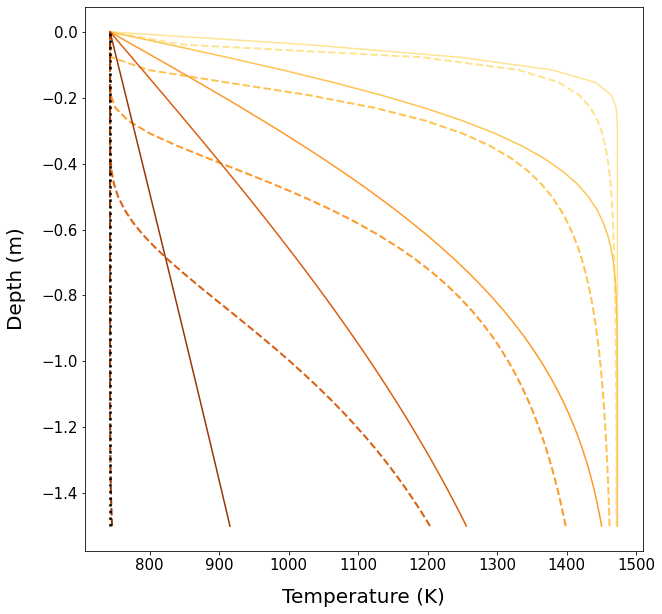

In [6]:
z = np.linspace(1.5, 0.0, 40)
diffusivity = 4e-7
time = np.array([2, 24, 24*7, 24*30, 24*30*12]) * 3600
T = np.zeros((len(time), len(z)), dtype=np.float32)
T_con = np.zeros((len(time), len(z)), dtype=np.float32)
# T_lin = 
Tlava = 1200 + 273
Tsurf = Tg_Kelvin 
# colors = ["#000000","#004949","#009292","#ff6db6","#ffb6db",
#  "#490092","#006ddb","#b66dff","#6db6ff","#b6dbff",
#  "#920000","#924900","#db6d00","#24ff24","#ffff6d"]

# colors = ["#004949","#ff6db6",
#  "#490092","#6db6ff",
#  "#920000","#924900","#db6d00","#24ff24","#ffff6d"]

colors = ["#fee391", "#fec44f", "#fe9929", "#d95f0e", "#993404"]

labels = ["2 hours", "1 day", "1 week", "1 month", "1 year"]

fig = plt.figure(figsize = (10,10))


for i in range(len(time)):
    T[i] = Tsurf + (Tlava-Tsurf) * np.exp(-1*diffusivity * time[i] / z**2)
    T_con[i] = Tsurf + (Tlava-Tsurf) * special.erf(z / np.sqrt(4 * diffusivity * time[i]))
    
    plt.plot(T[i], -z, c = colors[i], linestyle = '--', linewidth = 2) #, label = labels[i])
    plt.plot(T_con[i], -z, c = colors[i], label = labels[i])
    
    
    # plt.plot(10*z , z, color = 'red')
    # plt.plot(.85*z , z, color = 'red')
    # plt.plot(.45*z , z)
    # plt.plot(.1*z , z)

plt.plot(Tsurf*np.ones_like(z), -z, 'k', linestyle=":", label = "constant T", linewidth = 2.5)
# plt.plot(T, z)
# plt.xlim(400,1300)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
#           fancybox=True, ncol=3, fontsize=20)
plt.xlabel("Temperature (K)", fontsize = 20, labelpad=15)
plt.ylabel("Depth (m)", fontsize = 20, labelpad=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
# plt.gca().invert_yaxis()
plt.savefig("temp_prof_lorenz.png")
# plt.legend(fontsize = 20)
plt.show()


In [8]:
Tbh_erf = np.zeros((len(time), len(thetai_deg)), dtype=np.float32)
beta = ka / np.cos(np.deg2rad(thetai_deg))
print(beta, ka)

for i in range(len(time)):
    alpha = 1 / np.sqrt(4 * diffusivity*time[i])
    Tbh_erf[i] = (1-Rh) *  (Tsurf + ((2*(Tlava-Tsurf)/np.pi**0.5) * np.exp(np.square(beta/(2*alpha))) * (1 - special.erf(beta/(2*alpha)))))


[0.27288285 0.27362135 0.27585698 0.27965142 0.28511221 0.29240032
 0.30174234 0.31344884 0.32794202 0.34579754 0.36780915 0.39509122
 0.42924753 0.47266133 0.52902189 0.60434704 0.70914746 0.86355969
 1.11160481 1.57146969] 0.2728828478429317


/home/iganesh/anaconda3/envs/radar/lib/python3.7/site-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


In [8]:
# Tbh_lin = np.zeros((len(m), len(thetai_deg)), dtype=np.float32)
# for i in range(len(m)):
#     ### linear temperature profile
#     Tbh_lin[i] = (1-Rh) * ((b[i]*np.cos(np.deg2rad(thetai_deg))) + (m[i]*np.cos(np.deg2rad(thetai_deg))) / ka) 

/home/iganesh/anaconda3/envs/radar/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


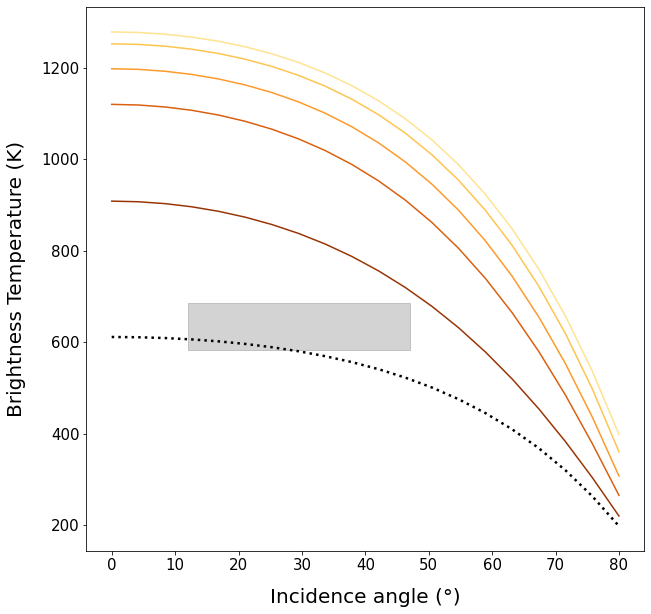

In [9]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10, 10)
ax.tick_params(axis='both', which='major', labelsize=14)


ax.plot(thetai_deg, Tbh, 'k', linestyle=":", label = "746 K", linewidth = 2.5)
for i in range(len(time)):
    ax.plot(thetai_deg, Tbh_erf[i], c = colors[i])
    
mag_thi = np.linspace(12, 47, 10)    
mag_tb_min = np.ones_like(mag_thi) * (635.4576 - 51.163)
mag_tb_max = np.ones_like(mag_thi) * (635.4576 + 51.163)

ax.fill_between(mag_thi, mag_tb_min, mag_tb_max, color = "#252525", edgecolor = None, alpha = 0.2, label = "Magellan $T_{B}$")
    
ax.set_xlabel("Incidence angle (°)", fontsize=20, labelpad=15)
ax.set_ylabel("Brightness Temperature (K)", fontsize=20, labelpad=15)
    

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
# plt.legend(fontsize = 14)
plt.savefig("brightness_temp_mag.png")
plt.show()

/home/iganesh/anaconda3/envs/radar/lib/python3.7/site-packages/ipykernel_launcher.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
/home/iganesh/anaconda3/envs/radar/lib/python3.7/site-packages/ipykernel_launcher.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
/home/iganesh/anaconda3/envs/radar/lib/python3.7/site-packages/ipykernel_launcher.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
/home/iganesh/anaconda3/envs/radar/lib/python3.7/site-packages/ipykernel_launcher.py:25: ComplexWarning: Casting complex values to real discards the imaginary part


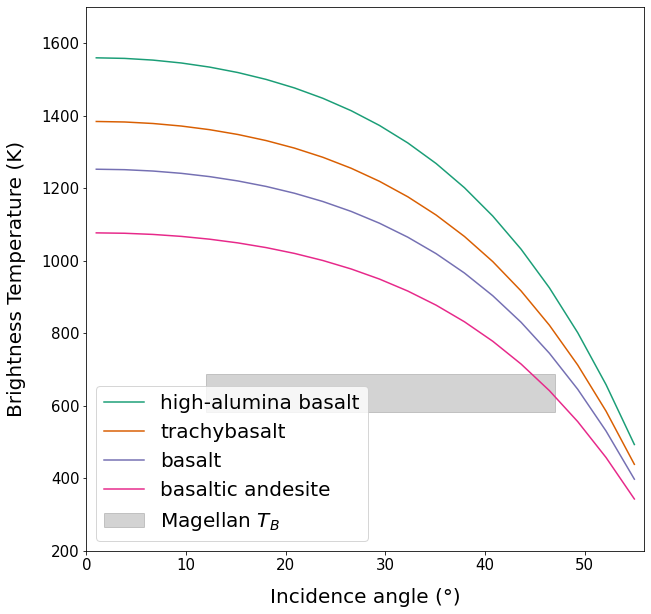

In [10]:
Tlava = np.array([1550, 1350, 1200, 1000]) + 273
z = np.linspace(1.5, 0.0, 40)
diffusivity = 4e-7
times = np.array([24, 24*30, 24*30*12, 24*30*12*10]) * 3600
thetai_deg = np.linspace(1, 55, 20)
colors = ["#1b9e77", "#d95f02", "#7570b3", "#e7298a", "#66a61e"]

Tsurf = Tg_Kelvin 
Tbh_erf = np.zeros((len(Tlava), len(thetai_deg)), dtype=np.float32)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(10, 10)
ax.tick_params(axis='both', which='major', labelsize=14)

# ax.plot(thetai_deg, Tbh, 'k', linestyle=":", label = "746 K", linewidth = 2.5)

time = times[0]
beta = ka / np.cos(np.deg2rad(thetai_deg))
alpha = 1 / np.sqrt(4 * diffusivity*time)
labels = ["high-alumina basalt", "trachybasalt", "basalt", "basaltic andesite"]


    
for i in range(len(Tlava)):
    Tbh_erf[i] = (1-Rh) *  (Tsurf + ((2*(Tlava[i]-Tsurf)/np.pi**0.5) * np.exp(np.square(beta/(2*alpha))) * (1 - special.erf(beta/(2*alpha)))))
    ax.plot(thetai_deg, Tbh_erf[i], label = labels[i], c = colors[i])

mag_thi = np.linspace(12, 47, 10)    
mag_tb_min = np.ones_like(mag_thi) * (635.4576 - 51.163)
mag_tb_max = np.ones_like(mag_thi) * (635.4576 + 51.163)

ax.fill_between(mag_thi, mag_tb_min, mag_tb_max, color = "#252525", edgecolor = None, alpha = 0.2, label = "Magellan $T_{B}$")
    
ax.set_xlabel("Incidence angle (°)", fontsize=20, labelpad=15)
ax.set_ylabel("Brightness Temperature (K)", fontsize=20, labelpad=15)
ax.set_ylim(200, 1700)  
ax.set_xlim(0, 56)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 20)
plt.savefig("brightness_temp_t0.png")
plt.show()

0.03150980811622683


/home/iganesh/anaconda3/envs/radar/lib/python3.7/site-packages/numpy/ma/core.py:2832: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)
/home/iganesh/anaconda3/envs/radar/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: No contour levels were found within the data range.


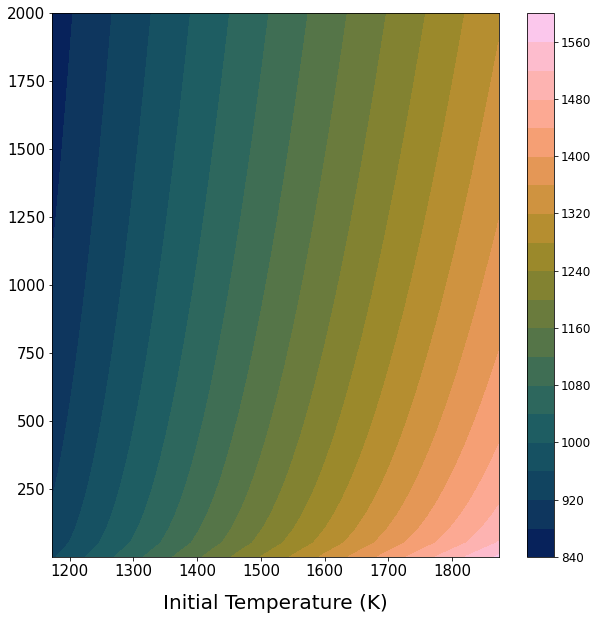

In [11]:
Tlava = np.linspace(900+273, 1600+273, 40)
age = np.linspace(1, 2000, 40)

Temp, time = np.meshgrid(Tlava, age)

### thermal properties
diffusivity = 5e-7

### dielectric properties
eps1 = 1+0j
eps2 = 6 + 0.001j
thi = np.deg2rad(30)
rh, th, Rh, Th = FresnelH(eps1, eps2, thi)
ka  = 2 * (2*np.pi/wavelength) * np.sqrt(eps2.real) * np.sqrt(0.5 * (-1 + np.sqrt(1 + (eps2.imag / eps2.real)**2)))
beta = ka / np.cos(thi)
print(beta)

Tbh_cooling = np.zeros((len(Tlava), len(age)), dtype = np.float32)

Tbh_cooling = (1 - Rh) * (Tsurf + 
                          ((2*(Temp-Tsurf)/np.pi**0.5) * 
                           np.exp(np.square(beta/(2*(1/np.sqrt(4*diffusivity*time*24*3600))))) * 
                           (1 - special.erf(beta/(2*(1/np.sqrt(4*diffusivity*time*24*3600)))))))


fig, ax = plt.subplots(1,1)
fig.set_size_inches(10, 10)

con = ax.contourf(Tlava, age, Tbh_cooling, levels = 20, cmap=cmc.batlow)
ax.contour(Tlava, age, Tbh_cooling, levels = [800], linewidths = 2.5, colors = "white")

ax.set_xlabel("Age (in days)", fontsize=20, labelpad=15)
ax.set_xlabel("Initial Temperature (K)", fontsize=20, labelpad=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
cbar = plt.colorbar(con)
cbar.ax.tick_params(labelsize=12)
plt.show()


(5+0.01j) 2.897102335727703
(5+0.005j) 5.794202498112894
(5+0.001j) 28.971008958925733


/home/iganesh/anaconda3/envs/radar/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: No contour levels were found within the data range.


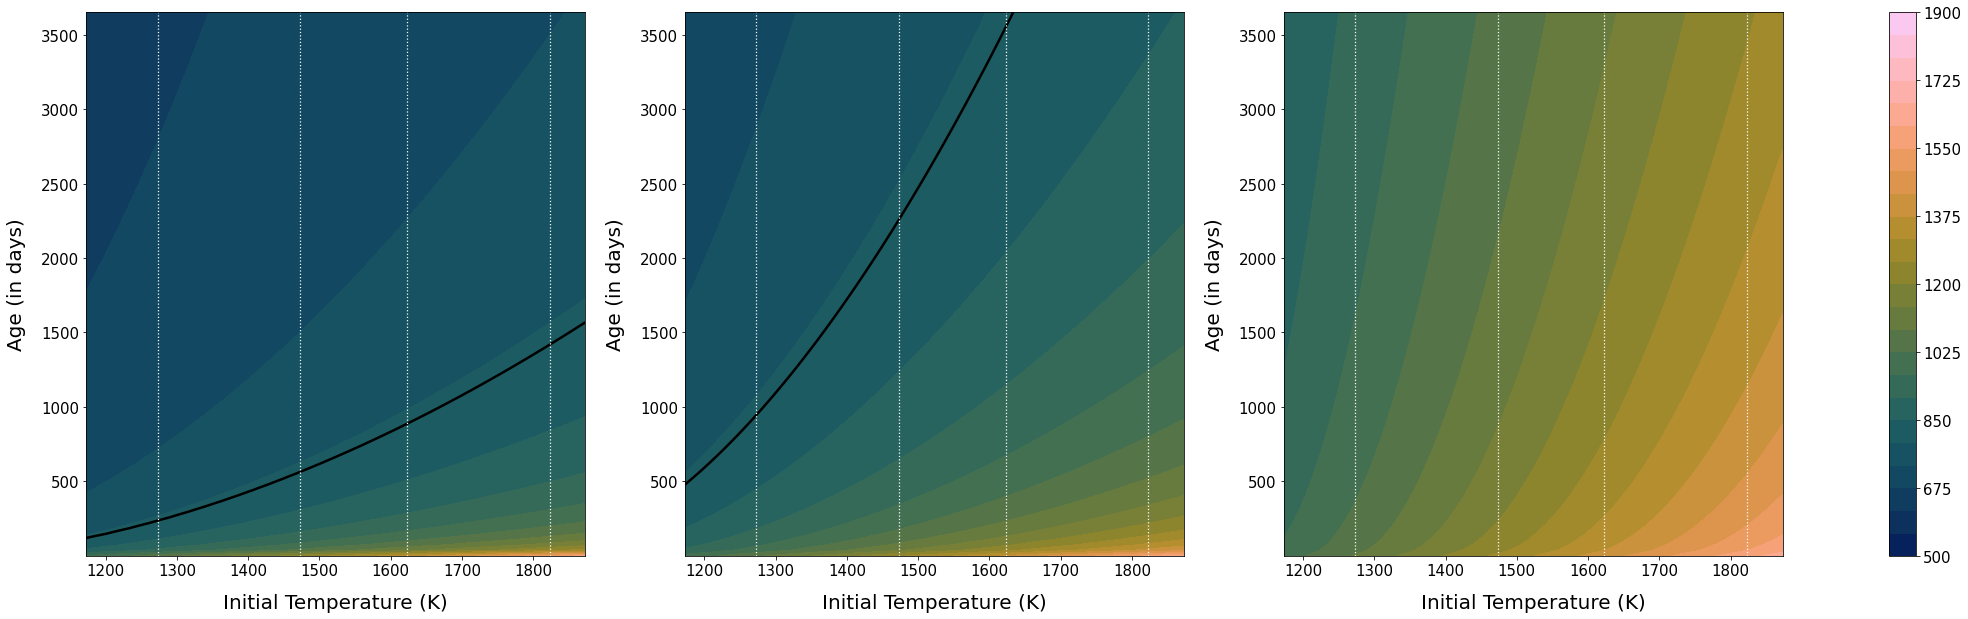

In [15]:
Tlava = np.linspace(900+273, 1600+273, 100)

age = np.linspace(1, 365*10, 100)

Temp, time = np.meshgrid(Tlava, age)

### thermal properties
diffusivity = 5e-7

fig, ax = plt.subplots(1,3)
fig.set_size_inches(38, 10)

eps1r = 5
layer2 = [eps1r + 0.01j, eps1r + 0.005j, eps1r + 0.001j]

for i in range(len(layer2)):
    ### dielectric properties
    eps1 = 1+0j
    eps2 = layer2[i]
    thi = np.deg2rad(30)
    rh, th, Rh, Th = FresnelH(eps1, eps2, thi)
    ka  = 2 * (2*np.pi/wavelength) * np.sqrt(eps2.real) * np.sqrt(0.5 * (-1 + np.sqrt(1 + (eps2.imag / eps2.real)**2)))
    beta = ka / np.cos(thi)
    print(eps2, 1/beta)

    Tbh_cooling = np.zeros((len(Tlava), len(age)), dtype = np.float32)

    Tbh_cooling = (1 - Rh) * (Tsurf + 
                              ((2*(Temp-Tsurf)/np.pi**0.5) * 
                               np.exp(np.square(beta/(2*(1/np.sqrt(4*diffusivity*time*24*3600))))) * 
                               (1 - special.erf(beta/(2*(1/np.sqrt(4*diffusivity*time*24*3600)))))))




    con = ax[i].contourf(Tlava, age, Tbh_cooling, levels = np.linspace(500, 1900, 25), cmap=cmc.batlow)
    ax[i].axvline(1550+273, linestyle = ":", linewidth = 1.25, color = "white")
    ax[i].axvline(1350+273, linestyle = ":", linewidth = 1.25, color = "white")
    ax[i].axvline(1200+273, linestyle = ":", linewidth = 1.25, color = "white")
    ax[i].axvline(1000+273, linestyle = ":", linewidth = 1.25, color = "white")
    ax[i].contour(Tlava, age, Tbh_cooling, levels = [800], linewidths = 2.5, colors = 'k')
    # ax[i].set_yscale("log")
    ax[i].set_ylabel("Age (in days)", fontsize=20, labelpad=15)
    ax[i].set_xlabel("Initial Temperature (K)", fontsize=20, labelpad=15)
    ax[i].tick_params(labelsize=15)
    

cbar = plt.colorbar(con, ax=ax.ravel().tolist())
cbar.ax.tick_params(labelsize=15)

plt.savefig("brightness_temp_loss.png", dpi=600)
plt.show()

0.03451726522254615


/home/iganesh/anaconda3/envs/radar/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: No contour levels were found within the data range.


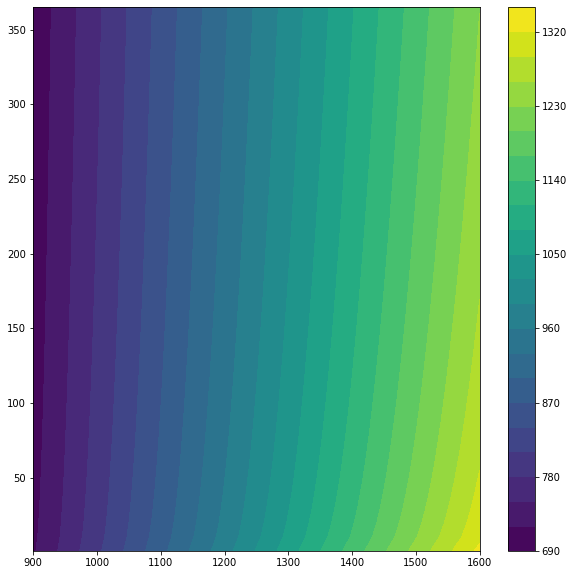

In [13]:
Tlava = np.linspace(900, 1600, 40)
age = np.linspace(1, 365, 40)

Temp, time = np.meshgrid(Tlava, age)

### thermal properties
diffusivity = 5e-7

### dielectric properties
eps1 = 1+0j
eps2 = 6 + 0.1j
thi = np.deg2rad(30)
rh, th, Rh, Th = FresnelH(eps1, eps2, thi)
beta = ka / np.cos(thi)
ka  = 2 * (2*np.pi/wavelength) * np.sqrt(eps2.real) * np.sqrt(0.5 * (-1 + np.sqrt(1 + (eps2.imag / eps2.real)**2)))
print(beta)

Tbh_cooling = np.zeros((len(Tlava), len(age)), dtype = np.float32)

Tbh_cooling = (1 - Rh) * (Tsurf + 
                          ((2*(Temp-Tsurf)/np.pi**0.5) * 
                           np.exp(np.square(beta/(2*(1/np.sqrt(4*diffusivity*time*24*3600))))) * 
                           (1 - special.erf(beta/(2*(1/np.sqrt(4*diffusivity*time*24*3600)))))))


fig, ax = plt.subplots(1,1)
fig.set_size_inches(10, 10)

con = ax.contourf(Tlava, age, Tbh_cooling, levels = 20)
ax.contour(Tlava, age, Tbh_cooling, levels = [655])
plt.colorbar(con)
plt.show()

### Depth of penetration

In [27]:
eps = 5 + 0.01j
k0 = 2 * np.pi / .126
dp_ulaby1 = 1 / (2 * k0 * np.sqrt(eps).imag)
dp_ulaby2 = np.sqrt(eps.real) / k0 / eps.imag
dp_bruce = 0.5 / (k0 * np.sqrt(eps.real/2 * (np.sqrt(1 + (eps.imag/eps.real)**2)-1)))

print(dp_ulaby1, dp_ulaby2, dp_bruce)

4.484106265577424 4.484104023528216 4.484106265716758


In [26]:
3 * dp_ulaby1 * np.cos(np.pi/4)

95.12221135309156